#**Factores que influyen en el peso de las personas.**


---




##**Índice:**

*  1 - Abstract con motivación y audiencia.
*  2 - Contexto y objetivos.
*  3 - Información a utilizar (dataset).
*  4 - Preguntas/Hipótesis que queremos responder con el estudio.
*  5 - Importación de librerias y carga de Dataset.
*  6 - Análisis general de los datos.
*  7 - Agregamos el campo IMC (Índice Masa Corporal).
*  8 - Análisis por tipo de dato.
*  .......... 8.1 - Variables categóricas.
*  .......... 8.2 - Variables numéricas.
*  9 - Normalización.
*  10 - Estudios sobre preguntas e hipótesis.
*  .......... 10.1. ¿La población consultada tiene mayoritariamente algún grado de sobrepeso u obesidad?
*  .......... 10.2. ¿Influyen los antecedentes familiares en el sobrepeso?
*  .......... 10.3. ¿Cuál es el intervalo de confianza para el 95% de la media del IMC?
*  .......... 10.4. ¿Cómo se distribuyen las distintas categorías de NObeyesdad y de cat_IMC respecto a las edades estudiadas?
*  .......... 10.5. ¿Cómo es la clasificación respecto a la categorización sobre el IMC?
*  .......... 10.6. ¿Cómo es la clasificación respecto a la categorización inicial de NObeyesdad?
*  .......... 10.7. ¿Existe relación entre el IMC y los campos de la encuesta?
*  .......... 10.8. ¿Cuáles son los componentes principales?

---







##**1 - Abstract con motivación y audiencia:**

El estudio en cuestión busca analizar distintos hábitos y costumbres cotidianas de las personas, y poder identificar los factores que mayor relevancia tienen en su peso.

Esto es importante para poder gestionar distintas políticas en diversas áreas buscando prevenir enfermedades, e incentivando una mayor conciencia personal y familiar, buscando generar una mejor calidad de vida.

Existen distintas entidades que se deben involucrar en esta problemática y gestionar acciones al respecto desde distintos ángulos:
*   Organismos de salud.
*   Organismos educativos de distintos niveles, tanto públicos como privados.
*   Empresas.

##**2 - Contexto y objetivos:**

**Contexto Comercial:**

Se busca poder conocer mejor la problemática del sobrepeso, identificar y diferenciar las dos grandes segmentaciones de sobrepeso y obesidad, y poder generar mejores políticas y campañas de prevención para poder reducirla.

**Definición de Objetivo:**

Predecir los factores que más favorecen el sobrepeso de las personas en relación a la alimentación, actividad física, entre otras.

**Contexto Analítico:**

Utilizando la información del dataset en conjunto con técnicas de análisis de datos y distintos modelos, se buscará dar respuestas a las preguntas e hipótesis planteadas posteriormente.


##**3 - Información a utilizar (dataset):**

Para poder desarrollar el estudio en cuestión se utiliza información obtenida de una encuesta web anónima a habitantes de México, Perú y Colombia, dentro de una franja etaria de entre 14 y 61 años.  

De dicha encuesta se recopila información de 2111 personas sobre los siguientes campos:
*   Gender: Género.
*   Age: Edad.
*   Height: Altura.
*   Weight: Peso.
*   Family_history_with_overweight: Historial familiar con sobrepeso.
*   FAVC: Frecuencia de consumo de alimentos altos en calorías por semana.
*   FCVC: Frecuencia de consumo de vegetales por semana.
*   NCP: Número de comidas principales por día.
*   CAEC: Consumo de alimentos entre comidas.
*   SMOKE: Consumo de tabaco.
*   CH2O: Consumo de agua diario.
*   SCC: Control del consumo de calorías.
*   FAF: Frecuencia de actividad física por semana.
*   TUE: Tiempo de uso de dispositivos tecnológicos por semana.
*   CALC: Consumo de alcohol.
*   MTRANS: Transporte utilizado.
*   NObeyesdad: Nivel de obesidad.

La información se extrajo del siguiente link:
https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

Se debe aclarar que el campo "NObeyesdad" indica la clasificación respecto al IMC (Índice de Masa Corporal), el cual relaciona el peso con la altura mediante la siguiente fórmula:

$$IMC = \frac{peso}{altura*altura}$$

A continuación se encuentran los diferentes rangos de clasificación:
*   Insufficient_Weight: menor de 18.5
*   Normal_Weight: entre 18.5 y 24.9
*   Overweight_Level_I: entre 25.0 y 26.9
*   Overweight_Level_I: entre 27.0 y 29.9
*   Obesity_Type_I: entre 30.0 y 34.9
*   Obesity_Type_II: entre 35.0 y 39.9
*   Obesity_Type_III: mayor que 40.0







##**4 - Preguntas/Hipótesis que queremos responder con el estudio:**

1.   ¿La población consultada tiene mayoritariamente algún grado de sobrepeso u obesidad?

2.   ¿Influyen los antecedentes familiares en el sobrepeso?

3.   ¿Cuál es el intervalo de confianza para el 95% de la media del IMC?

4.   ¿Cómo se distribuyen las distintas categorías de NObeyesdad y de cat_IMC respecto a las edades estudiadas?

5.   ¿Cómo es la clasificación respecto a la categorización sobre el IMC?

6.   ¿Cómo es la clasificación respecto a la categorización inicial de NObeyesdad?

7.   ¿La forma de clasificación planteada es correcta o conviene otra?

8.   ¿Cuáles son los componentes principales?

##**5 - Importación de librerias y carga de Dataset:**

In [521]:
# Carga de datos
from google.colab import drive

# Trataimento de datos:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

# Gráficos:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadística:
import scipy.stats as stats
from scipy.stats import t

# División en train y test:
from sklearn.model_selection import train_test_split

# Modelos de regresión:
from sklearn.linear_model import LinearRegression

# Modelos de clasificación:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Modelos de clustering:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Métricas:
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.cluster.hierarchy import dendrogram, linkage

In [522]:
# Montamos Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [523]:
# Especificamos la ruta al archivo
ruta_csv = '/content/drive/MyDrive/Coderhouse - Data Science/Entregas/2da entrega/ObesityDataSet.csv'

# Leemos el archivos con un DataFrame de pandas
df = pd.read_csv(ruta_csv, sep = ',')

In [524]:
# Configuramos el estilo de gráficos con el que vamos a trabajar
plt.style.use("dark_background")

##**6 - Análisis general de los datos:**

In [525]:
# Mostramos el DataFrame
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [526]:
# Cambiamos el tipo de dato del campo 'Age' de flotante a entero
df['Age'] = df['Age'].astype(int)

In [527]:
# Cambiamos la cantidad de decimales de los campos 'Height' y 'Weight'
df['Height'] = df['Height'].round(2)
df['Weight'] = df['Weight'].round(2)

In [528]:
# Verificamos la presencia de valores nulos
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [529]:
# Verificamos que los campos de edad, peso y altura no posean ceros.
print((df[["Age", "Height", "Weight"]]==0).sum())

Age       0
Height    0
Weight    0
dtype: int64


In [530]:
# Verificamos la existencia de duplicados
df.duplicated().any()

True

Podemos notar que no existen datos nulos, o fuera de los rangos esperados, pero que si hay filas repetidas, a las cuales se decide no quitarlas dado que como se indicó al inicio, la relevamiento original fue sobre 2111 personas de distintos países, por lo que no se descarta que una cierta cantidad mínima de datos se puedan repetir.

##**7 - Agregamos el campo IMC (Índice Masa Corporal):**

In [531]:
# Agregamos la columna IMC
df['IMC'] = (df['Weight'] / (df['Height'] * df['Height']))

# Redondeamos la cantidad de decimales para poder usar la categorización de NObeyesdad
df['IMC'] = df['IMC'].round(1)

In [532]:
# creamos una función para categorizar IMC
def categorias_imc(IMC):
    if IMC < 18.5:
        return 'insuficiente'
    elif 18.5 <= IMC < 25:
        return 'normal'
    elif 25 <= IMC < 27:
        return 'sobrepeso_I'
    elif 27 <= IMC < 30:
        return 'sobrepeso_II'
    elif 30 <= IMC < 35:
        return 'obesidad_I'
    elif 35 <= IMC < 40:
        return 'obesidad_II'
    else:
        return 'obesidad_III'

# Agregamos una nueva columna con la categorización
df['cat_IMC'] = df['IMC'].apply(categorias_imc)

In [533]:
# Verifico los valores únicos de NObeyesdad
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [534]:
# Verifico los valores únicos de cat_IMC
df['cat_IMC'].value_counts()

obesidad_I      369
obesidad_II     334
normal          303
sobrepeso_II    292
sobrepeso_I     276
obesidad_III    270
insuficiente    267
Name: cat_IMC, dtype: int64

Si queremos comparar la cantidad de datos de las distintas categorias de NObeyesdad con las de cat_IMC obtenemos que los valores difieren:
*   Insufficient_Weight: 272
*   insuficiente: 267


*   Normal_Weight: 287
*   normal: 303


*   Overweight_Level_I: 290
*   sobrepeso_I: 276


*   Overweight_Level_II: 290
*   sobrepeso_II: 292


*   Obesity_Type_I: 351
*   obesidad_I: 369


*   Obesity_Type_II: 297
*   obesidad_II: 334


*   Obesity_Type_III: 324
*   obesidad_III: 270

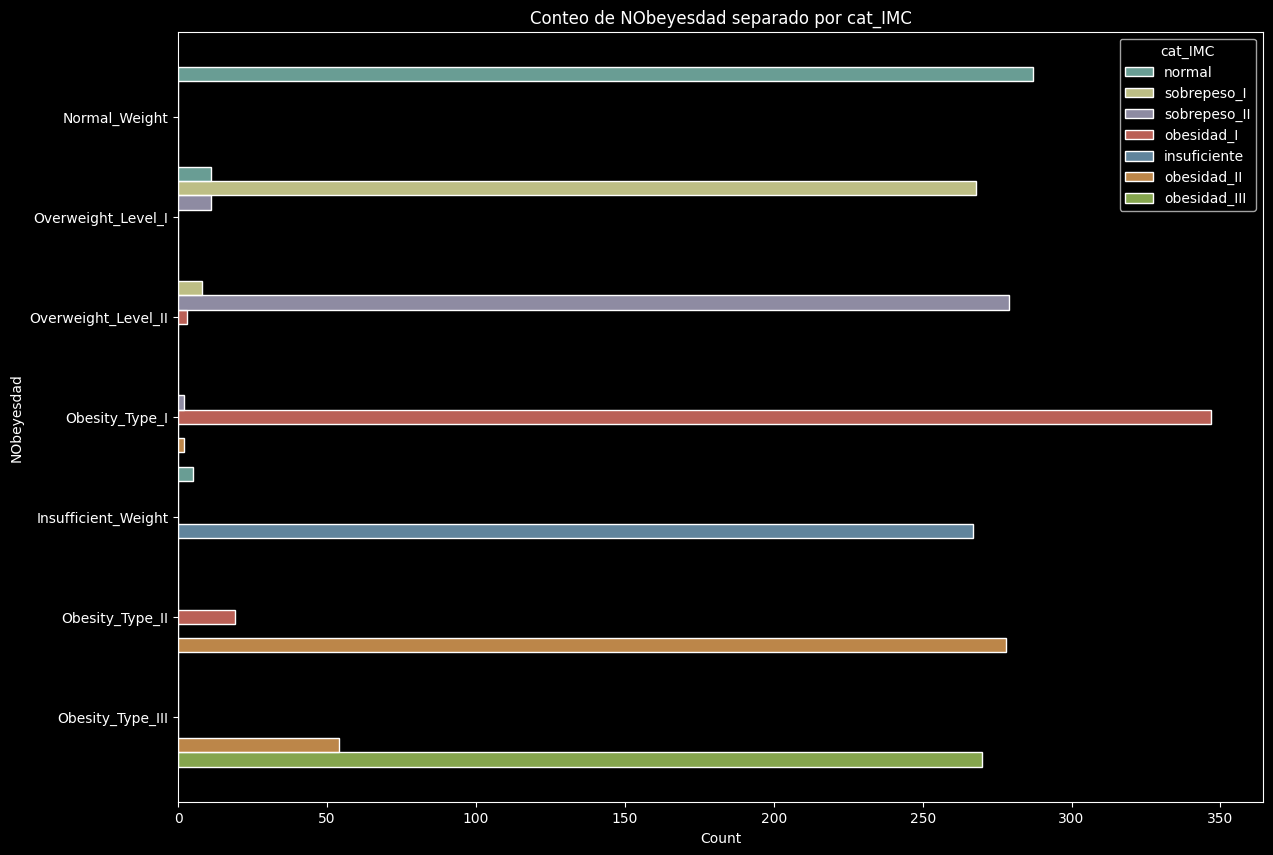

In [535]:
# Creo el gráfico
plt.figure(figsize=(14,10))
sns.histplot(df, y='NObeyesdad', bins='auto', hue= 'cat_IMC', multiple='dodge', shrink = 1.0)

# Título y ejes
plt.title("Conteo de NObeyesdad separado por cat_IMC")
plt.ylabel("NObeyesdad")

# Mostramos el gráfico
plt.show()

##**8 - Análisis por tipo de dato:**

In [537]:
# Analizamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

###**8.1 - Variables categóricas:**

In [538]:
# Verificamos los valores únicos de las variables categóricas
print(f"Gender: {df.Gender.unique()}\n")
print(f"family_history_with_overweight: {df.family_history_with_overweight.unique()}\n")
print(f"FAVC: {df.FAVC.unique()}\n")
print(f"CAEC: {df.CAEC.unique()}\n")
print(f"SMOKE: {df.SMOKE.unique()}\n")
print(f"SCC: {df.SCC.unique()}\n")
print(f"CALC: {df.CALC.unique()}\n")
print(f"MTRANS: {df.MTRANS.unique()}\n")
print(f"NObeyesdad: {df.NObeyesdad.unique()}\n")
print(f"cat_IMC: {df.cat_IMC.unique()}\n")

Gender: ['Female' 'Male']

family_history_with_overweight: ['yes' 'no']

FAVC: ['no' 'yes']

CAEC: ['Sometimes' 'Frequently' 'Always' 'no']

SMOKE: ['no' 'yes']

SCC: ['no' 'yes']

CALC: ['no' 'Sometimes' 'Frequently' 'Always']

MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']

cat_IMC: ['normal' 'sobrepeso_I' 'sobrepeso_II' 'obesidad_I' 'insuficiente'
 'obesidad_II' 'obesidad_III']



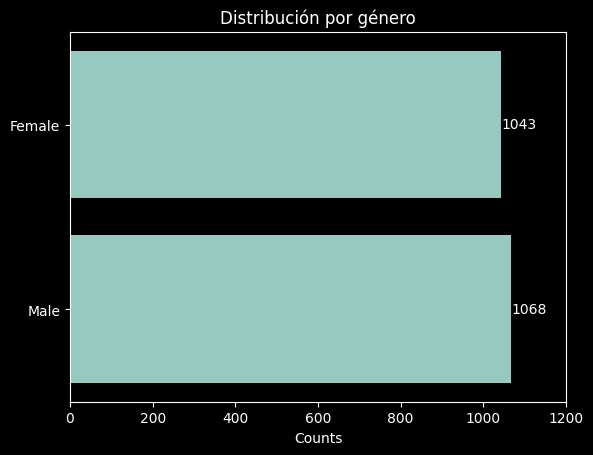

In [539]:
# Hacemos el estudio del género

# Creo el gráfico
ax = sns.countplot(df, y="Gender")

# Coloco títulos y etiquetas
ax.set_title("Distribución por género")
ax.set_ylabel("")
ax.set_xlabel("Counts")
ax.bar_label(ax.containers[0])
ax.set_xlim((0, 1200))

# Mostramos el gráfico
plt.show()

El relevamiento cuenta con 1068 encuestados masculinos, y 1043 encuestadas femeninas, es decir, la diferencia es menor al 1%.

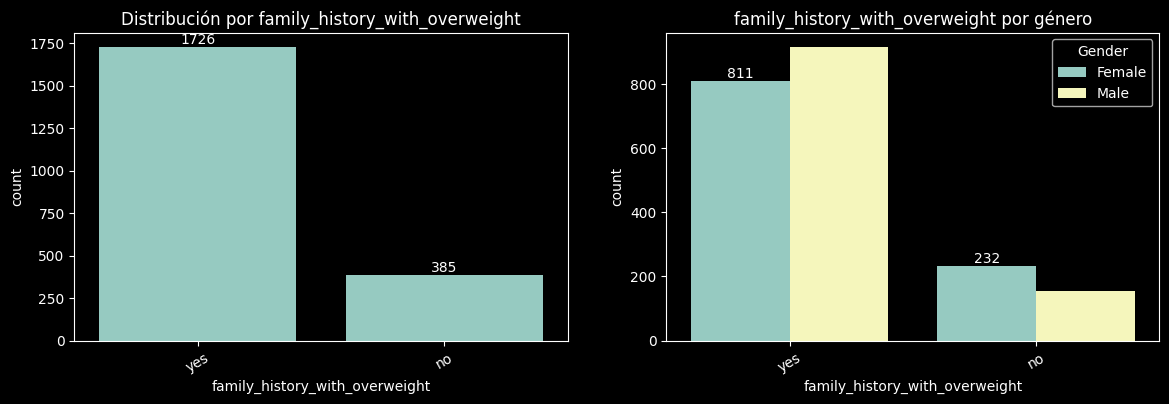

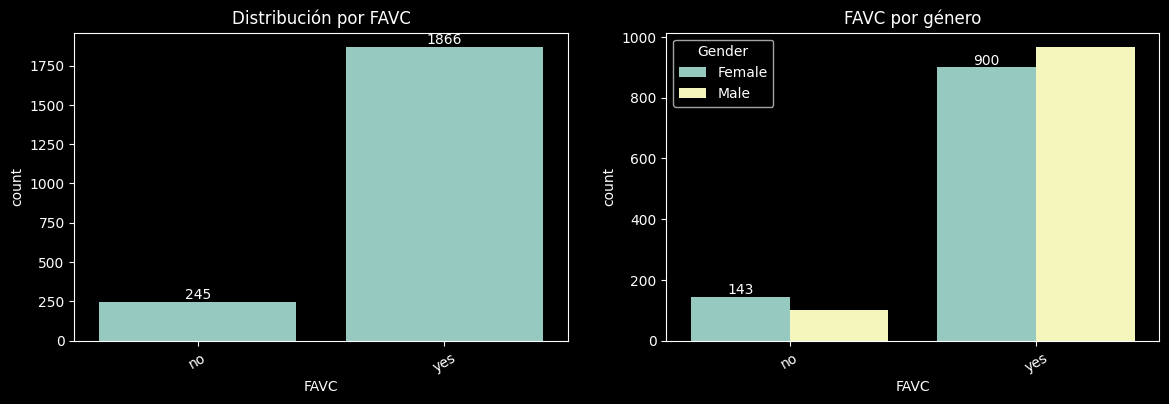

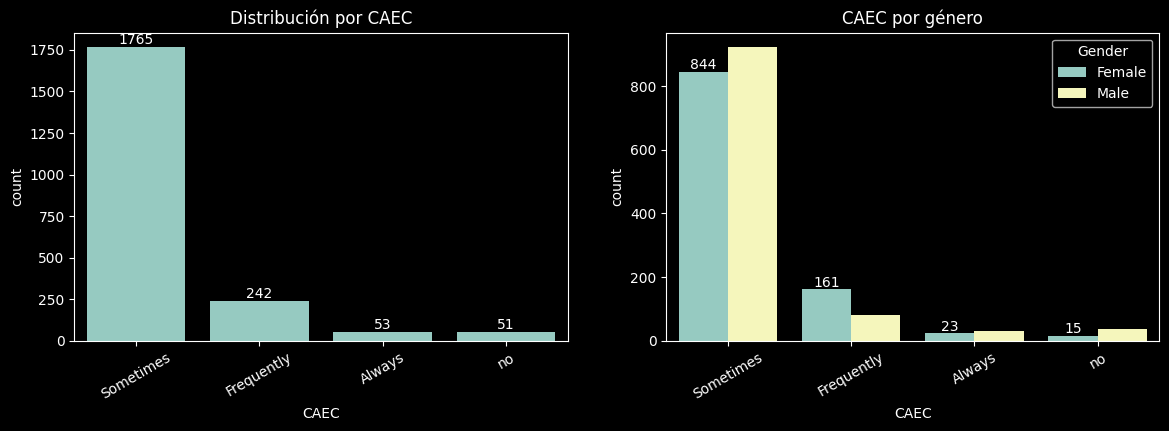

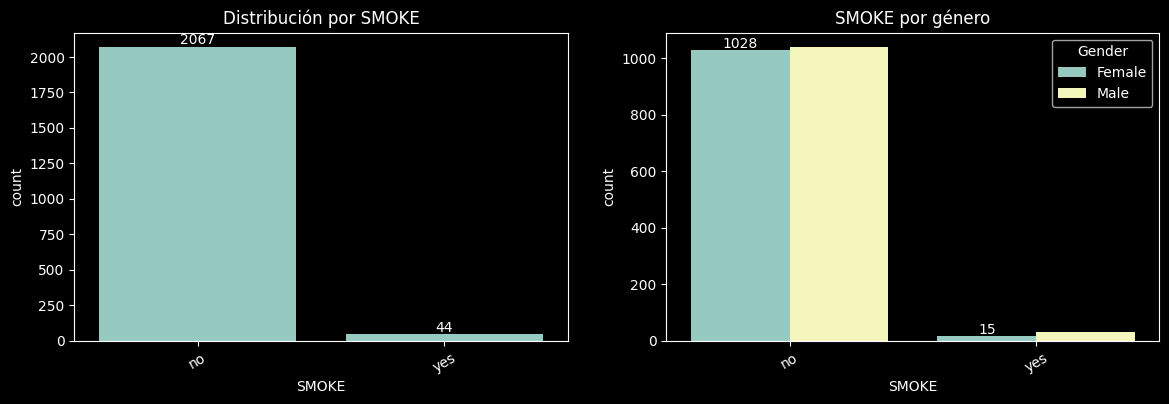

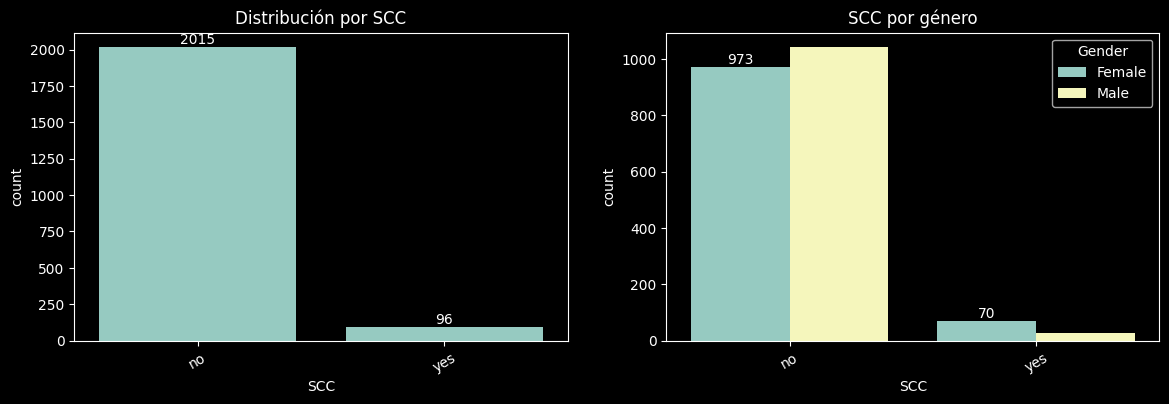

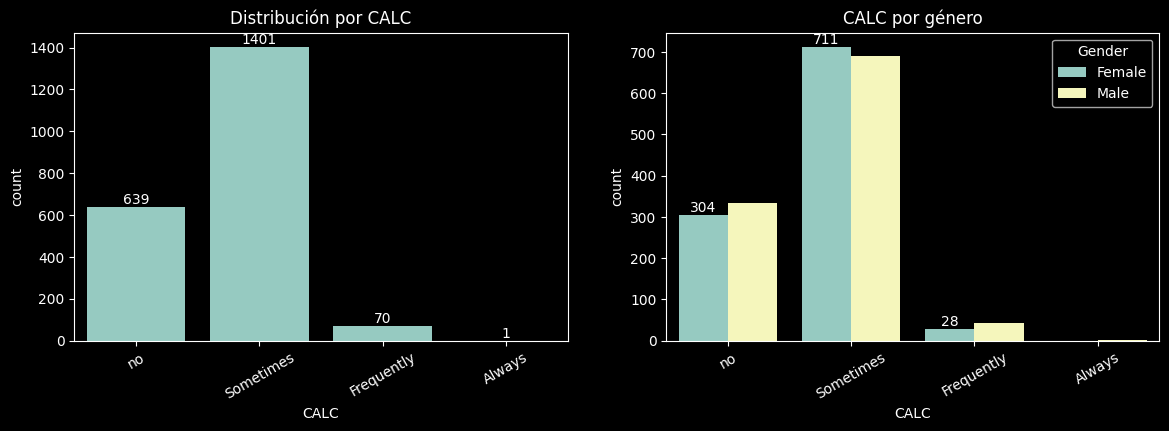

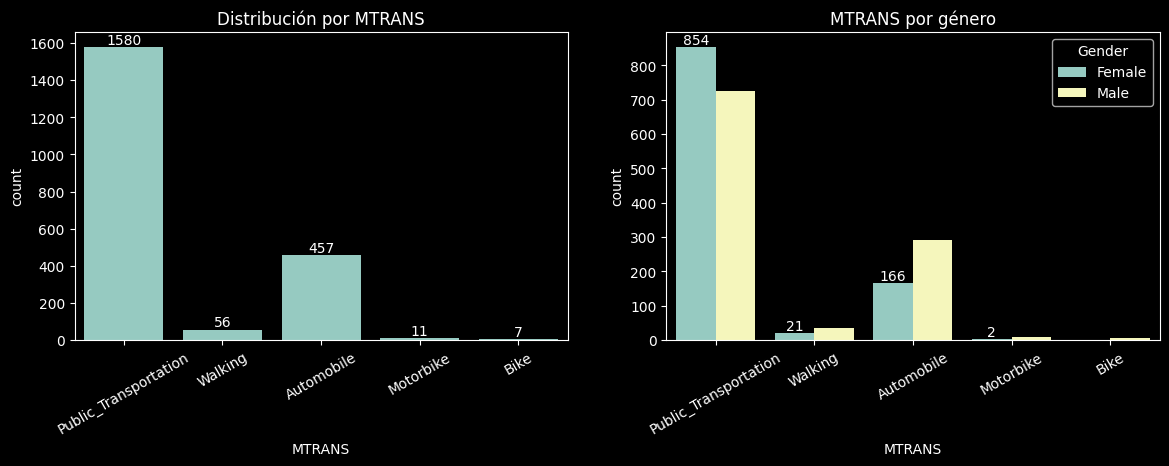

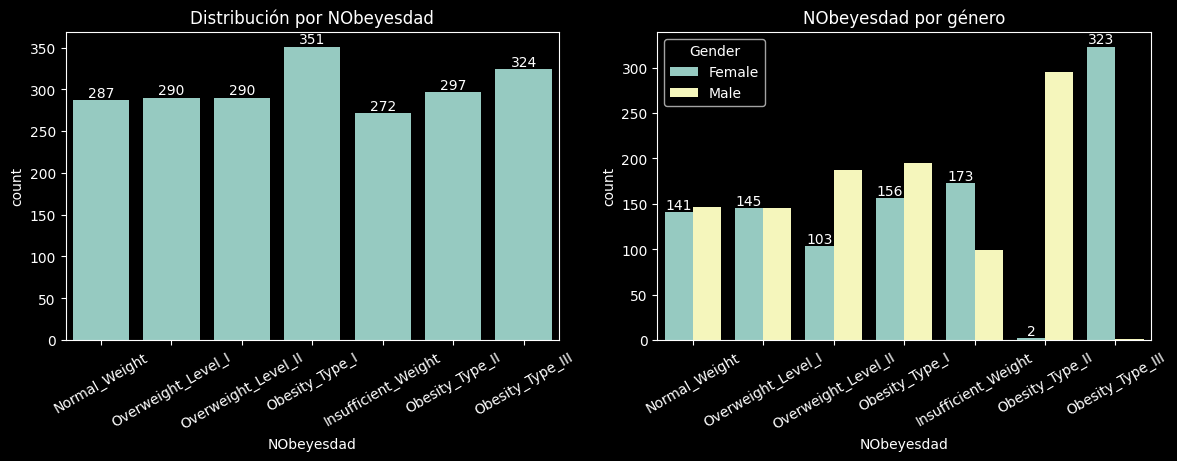

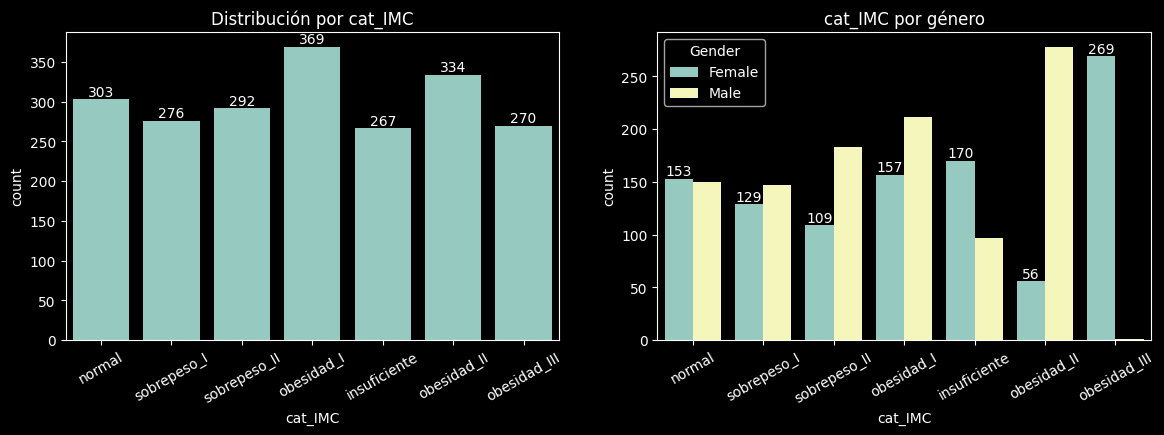

In [540]:
# Hacemos uso de un for para crear los gráficos
for col in df.columns:
  if df[col].dtypes == 'O' and col!='Gender':
    fig, axes = plt.subplots(1,2, figsize=(14,4), gridspec_kw={'width_ratios':[1,1]})
    sns.countplot(df, x=df[col], ax=axes[0])
    axes[0].set_title(f'Distribución por {col}')
    axes[0].bar_label(axes[0].containers[0])
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=30)
    sns.countplot(df, x=df[col], hue='Gender')
    axes[1].set_title(f'{col} por género')
    axes[1].bar_label(axes[1].containers[0])
    plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=30)
    plt.show()

**family_history_with_overweight**: Solo entre un 15 y un 20% no poseen antecedentes familiares de sobrepeso.

**FAVC**: Más del 85% consume alimentos altos en calorías.

**CAEC**: Menos del 3% no consume alimentos entre comidas, y apróximadamente lo hace a veces.

**SMOKE**: Menos del 2% fuma.

**SCC**: Más del 95% no controla las calorías que consume.

**CALC**: Apróximadamente el 30% manifiesta no consumir alcohol, y menos del 4% lo realiza con frecuencia o siempre.

**MTRANS**: El 75% utiliza transporte público, y sólo el 4% camina o utiliza bicicleta.

**NObeyesdad**: Se puede considerar que la muestra se distribuye pareja, siendo Obesity_Type_I el que más casos posee con el 16.6%, y Insufficient_Weight el de menos casos con el 12.9%.

**cat_IMC**: En este caso el 17.5% se da para obesidad_I como mayor, y el 12.7% para insuficiente como menor, muy parejo con obesidad_III con el 12.8%.

###**8.2 - Variables numéricas:**

In [541]:
# Hacemos un primer análisis estadístico general
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701620,86.586035,2.419043,2.685628,2.008011,1.010298,0.657866,29.702511
std,6.308664,0.093368,26.191163,0.533927,0.778039,0.612953,0.850592,0.608927,8.016745
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000
25%,19.000000,1.630000,65.470000,2.000000,2.658738,1.584812,0.124505,0.000000,24.300000
50%,22.000000,1.700000,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.700000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.477420,1.666678,1.000000,35.950000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.800000


Mínimos y máximos de los campos numéricos:
*   Age: de 14 a 61 años
*   Height: de 1.45 a 1.98 metros
*   Weight: de 39.00 a 173.00 kilos
*   FCVC: de 1.00 a 3.00
*   NCP: de 1.00 a 4.00
*   CH2O: de 1.00 a 3.00
*   FAF: de 0.00 a 3.00
*   TUE: de 0.00 a 2.00
*   IMC: de 13.00 a 50.80

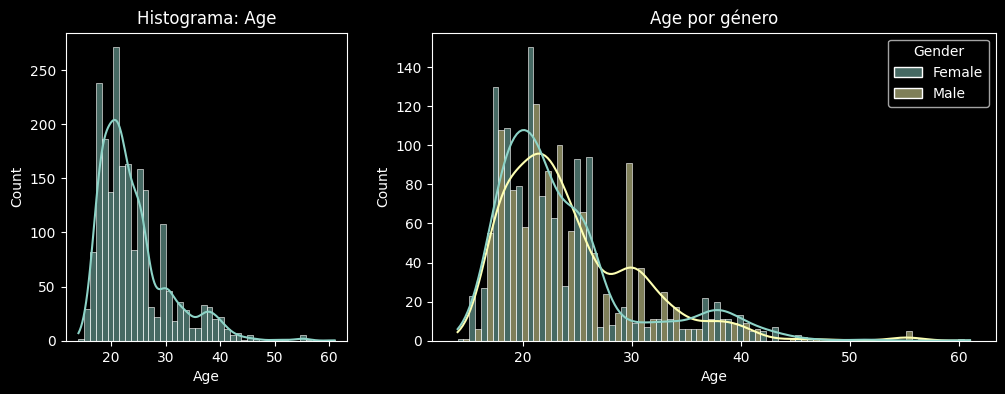

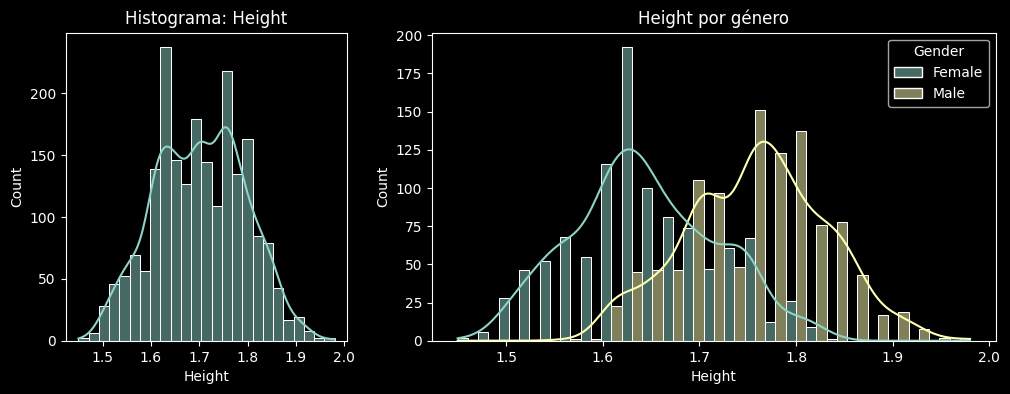

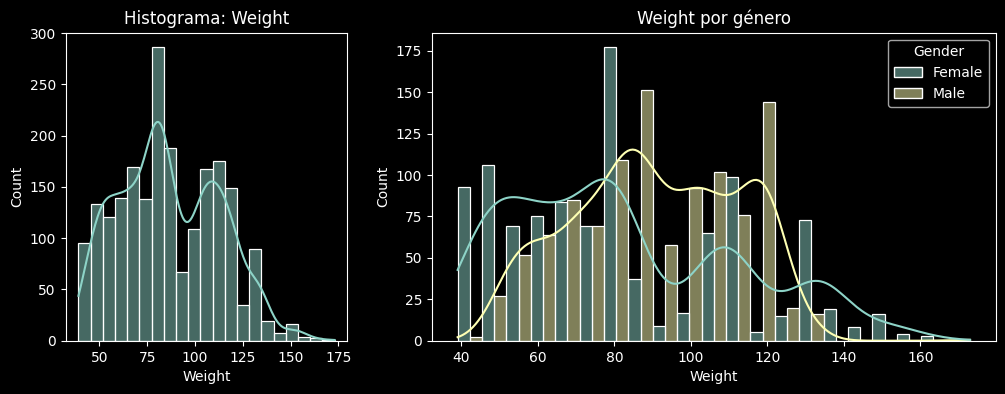

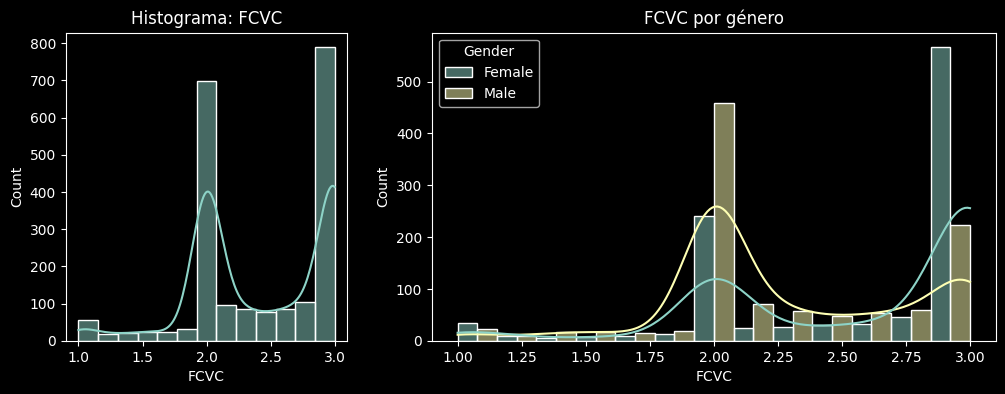

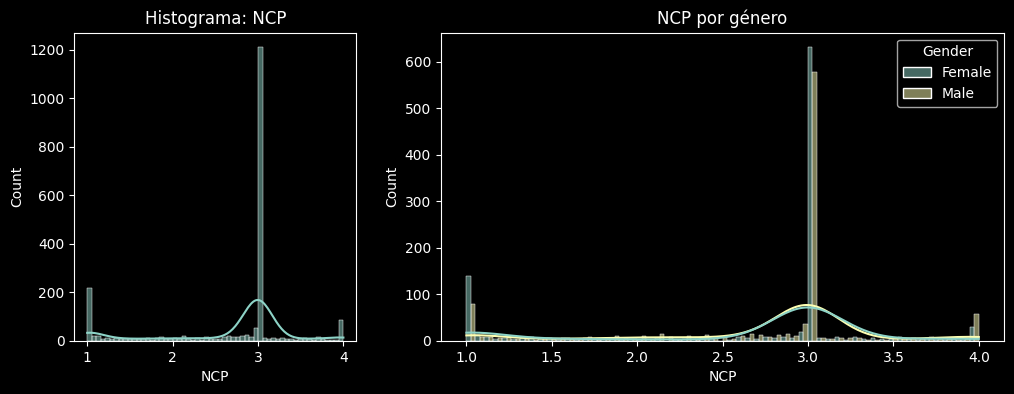

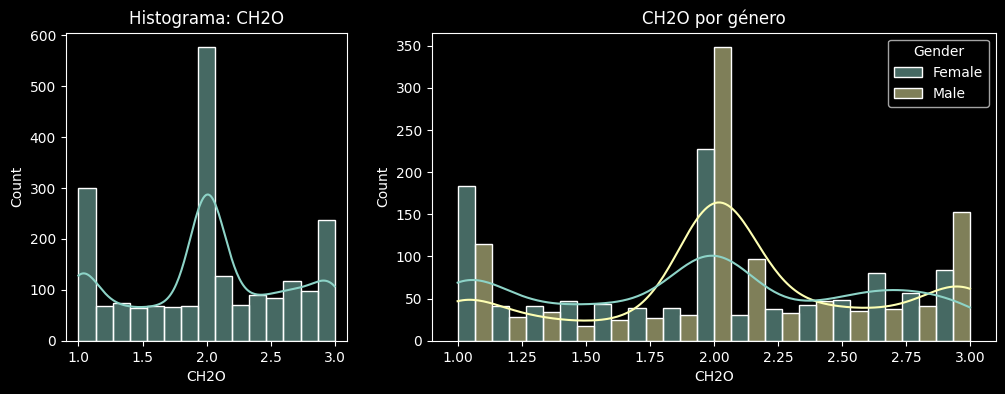

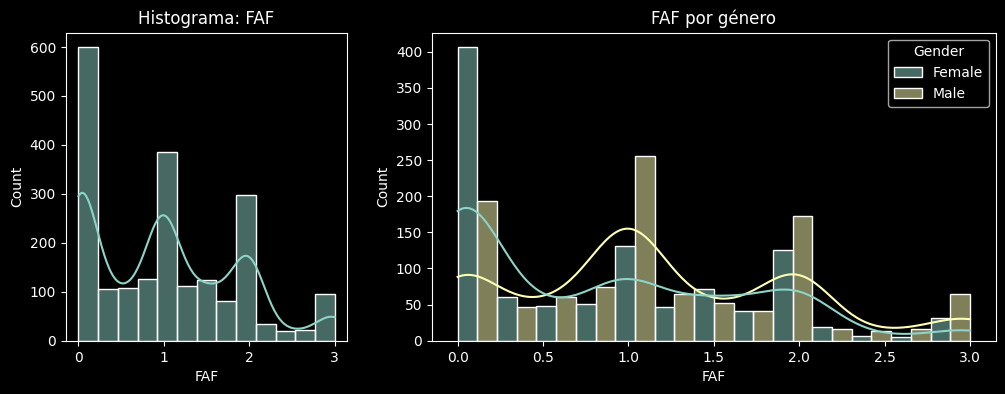

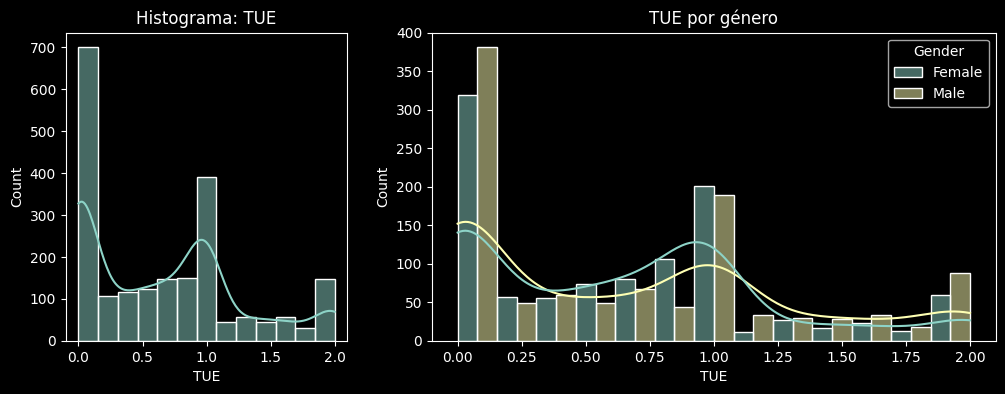

In [542]:
# Hacemos uso de un for para crear los gráficos
for col in df.columns:
  if df[col].dtypes != 'O' and col!='IMC':
    fig, axes = plt.subplots(1,2, figsize=(12,4), gridspec_kw={'width_ratios':[1,2]})
    sns.histplot(df, x=col, bins='auto', kde= True, ax=axes[0])
    axes[0].set_title(f'Histograma: {col}')
    sns.histplot(df, x=col, bins='auto', kde= True, hue='Gender', multiple='dodge')
    axes[1].set_title(f'{col} por género')
    plt.show()

**Age**: La franja etaria que fue mayormente consultada se encuentra entre los 20 y los 30 años apróximadamente. Disminuyendo considerablemente pasados los 40 años.

**Height**: Las alturas que poseen mayores consultas radican entre 1.60 y 1.80 metros, apróximadamente. Siendo los varones considerablemente más altos.

**Weight**: Hay una amplia variación de pesos, disminuyendo los casos cuando se superan los 130kg apróximadamente.

**FCVC**: Adoptando que: 1 = Nunca, 2 = A veces, 3 = Siempre; se puede decir que gran parte consume vegetales.

**NCP**: La mayoria realiza 3 comidas principales.

**CH2O**:

**FAF**: Adoptamos que: 0 = Ninguna, 1 = Baja, 2 = Moderada, 3 = Alta. Un gran número de las personas no realiza ningún tipo de actividad, siendo mucho mayor para las mujeres.

**TUE**: Adoptamos que: 0 = Bajo, 1 = Medio, 2 = Alto. Un gran porcentaje de las personas utiliza poco tiempo dispositivos tecnológicos.

In [543]:
# Creamos el pairplot para analizar la relación entre las variables
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

Vemos que los datos no tienen una relación lineal, salvo Weight con IMC, dado que se relacionan mediante la correspondiente fórmula.
Además, se puede deducir a mayor edad disminuye el uso de dispositivos electrónicos, como de actividad física.

##**9 - Normalización:**

In [544]:
# Hacemos una copia del dataset
df_inicial = df.copy()

In [545]:
# Selecciono las variables numéricas
var_num = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMC']

# Selecciono las variables categóricas
var_cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad', 'cat_IMC']

# Creo un DataFrame con las variables numéricas
df_num = df_inicial.drop((df_inicial[var_cat]), axis=1)

In [546]:
# Transformación de campos categóricos binarios:

# Selecciono las variables binarias
binary_features = [col for col in df_inicial.columns if df_inicial[col].nunique() == 2  and col not in var_num + ['customerID']]

# Aplicar LabelEncoder a las columnas binarias
label_encoder = LabelEncoder()
for col in binary_features:
    df_inicial[col] = label_encoder.fit_transform(df_inicial[col])

In [547]:
# Transformación de campos multiclases ordinales:

#Aplicamos OrdinalEncoder para darle el orden correspondiente
ordi = OrdinalEncoder(categories=[('no', 'Sometimes', 'Frequently', 'Always'),
                                  ('no', 'Sometimes', 'Frequently', 'Always'),
                                  ('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'),
                                  ('insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III')])
ordi.fit(df_inicial[['CAEC', 'CALC', 'NObeyesdad', 'cat_IMC']])

# Creo un DataFrame
df_ordinal = pd.DataFrame(ordi.transform(df_inicial[['CAEC', 'CALC', 'NObeyesdad', 'cat_IMC']]))

# Coloco nombre a las columnas
df_ordinal.columns=['CAEC', 'CALC', 'NObeyesdad', 'cat_IMC']

In [548]:
# Transformación de campos multiclases nominales:

# Aplicamos get_dummies
df_nominal = pd.get_dummies(df_inicial['MTRANS'], prefix= 'MTRANS')

In [549]:
# Cambiamos el tipo de dato a categórico
df_binario = df_inicial[binary_features].astype('category')
df_ordinal = df_ordinal.astype('category')
df_nominal = df_nominal.astype('category')

In [550]:
# Combinamos todas las columnas procesadas
df_preprocessed = pd.concat([df_num, df_binario, df_nominal, df_ordinal], axis=1)

# Mostramos el DataFrame preprocesado
df_preprocessed.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC,Gender,...,SCC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,CALC,NObeyesdad,cat_IMC
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,24.4,0,...,0,0,0,0,1,0,1.0,0.0,1.0,1.0
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,24.2,0,...,1,0,0,0,1,0,1.0,1.0,1.0,1.0
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,23.8,1,...,0,0,0,0,1,0,1.0,2.0,1.0,1.0
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,26.9,1,...,0,0,0,0,0,1,1.0,2.0,2.0,2.0
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,28.3,1,...,0,0,0,0,1,0,1.0,1.0,3.0,3.0


In [552]:
# Vemos el tipo de datos de los campos
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2111 non-null   int64   
 1   Height                          2111 non-null   float64 
 2   Weight                          2111 non-null   float64 
 3   FCVC                            2111 non-null   float64 
 4   NCP                             2111 non-null   float64 
 5   CH2O                            2111 non-null   float64 
 6   FAF                             2111 non-null   float64 
 7   TUE                             2111 non-null   float64 
 8   IMC                             2111 non-null   float64 
 9   Gender                          2111 non-null   category
 10  family_history_with_overweight  2111 non-null   category
 11  FAVC                            2111 non-null   category
 12  SMOKE               

##**10 - Estudios sobre preguntas e hipótesis:**

###**10.1. ¿La población consultada tiene mayoritariamente algún grado de sobrepeso u obesidad?**

#####**10.1.1. Prueba hipótesis para la media de una población (test univariado):**

######*Hipótesis nula:
> La hipótesis nula corresponde a la hipótesis de no cambio: $H_0:\mu=\mu_0$. En nuestro caso, $H_0$ sería equivalente a plantear la hipótesis de que el IMC promedio para toda la población $\mu$ es el mismo que el IMC máximo dentro de la franja que se considera "normal", siendo  $\mu_0 = 24.9$. Se quiere probar si $H_0$ es incorrecto; es decir, si $\mu$ es diferente de $\mu_0 = 24.9$.

######*Hipótesis alternativa:
> En oposición a la hipótesis nula, definimos una hipótesis alternativa (indicada con $H_a$​) para desafiar el statu quo. Nuestra hipótesis alternativa considera que mayoritariamente la población tiene algún grado de sobrepeso: $H_a: \mu > \mu_0$




######*Realización de una prueba de hipótesis:
> Se quiere realizar una prueba estadística para evaluar la hipótesis de gestión:

$$ H_0: \mu= 24.9$$
$$ H_a: \mu > 24.9$$

In [553]:
# Media previa a considerar
media_ant = 24.9

# Realizamos la prueba t de una muestra
t_stat, p_valor = stats.ttest_1samp(df['IMC'], media_ant)
p_valor/=2

# Imprimimos el estadístico de prueba y el p-valor
print(f"Estadística t: {t_stat}")
print(f"P-valor: {p_valor}")

Estadística t: 27.524178283104902
P-valor: 4.636821665122235e-143


**Alfa (α):** o nivel de significancia, lo vamos a establecer en 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de estar equivocados al rechazar la hipótesis nula.  

**Nivel de Confianza (1−α):** es el complemento de alfa. Como alfa es 0.05, entonces el nivel de confianza es 0.95 o 95%.

Como el P-valor es practicamente nulo, mucho menor que Alfa adoptado, se considera que $H_0$ es falso, y se rechaza. Se concluye que existe evidencia estadística para la alternativa $H_a$ y que el IMC de la población estudiada está por arriba del IMC considerado normal.

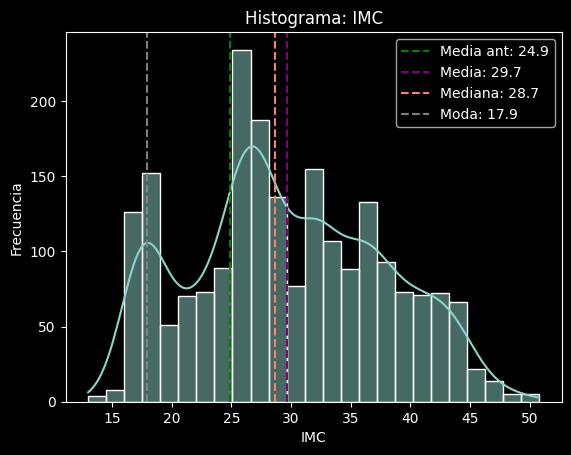

In [554]:
# Calculo la media, mediana y moda
media= df['IMC'].mean()
mediana= df['IMC'].median()
moda= df['IMC'].mode().values[0]

# Creo un histograma
sns.histplot(df, x='IMC', bins=25, kde= True)

# Señalamos la media anterior y la media de nuestra población, junto con la moda y la mediana
plt.axvline(media_ant, color='green', linestyle= '--', label=f'Media ant: {media_ant:.1f}')
plt.axvline(media, color='purple', linestyle= '--', label=f'Media: {media:.1f}')
plt.axvline(mediana, color='salmon', linestyle= '--', label=f'Mediana: {mediana:.1f}')
plt.axvline(moda, color='gray', linestyle= '--', label=f'Moda: {moda:.1f}')

# Etiquetamos los ejes
plt.xlabel("IMC")
plt.ylabel("Frecuencia")

# Agregamos las leyendas
plt.legend(loc='upper right')

# Agregamos el título
plt.title("Histograma: IMC")

# Mostramos el gráfico
plt.show()

Debido a la marcación de la media, la mediana y la moda en la gráfica podemos observar una asimetría positiva.

###**10.2. ¿Influyen los antecedentes familiares en el sobrepeso?**

#####**10.2.1. Prueba hipótesis para la media de dos poblaciones (test bivariado):**

######*Hipótesis nula:
> Siendo $\mu_1$ la media del IMC de la población con antecedentes familiares de sobrepeso, y $\mu_2$ la media del IMC de la población sin antecedentes. Se considera que: $H_0:\mu_1=\mu_2$.

######*Hipótesis alternativa:
> En oposición a la hipótesis nula, la hipótesis alternativa plantea que el IMC de ambas poblaciones es distinto: $H_a: \mu_1 \neq \mu_2$

######*Realización de una prueba de hipótesis:
> Se quiere realizar una prueba estadística para evaluar la hipótesis de gestión:
$$ H_0: \mu_1=\mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

In [556]:
# Filtramos los datos para obtener el IMC de las personas en base a los antecedentes familiares de sobrepeso
fh_yes = df[df.family_history_with_overweight == "yes"].IMC
fh_no = df[df.family_history_with_overweight == "no"].IMC

# Realizamos la prueba t independiente para comparar las medias de los dos grupos
#Usamos equal_var=False para realizar la prueba t de Welch, que no asume igualdad de varianzas
statistic, pvalue = stats.ttest_ind(fh_yes, fh_no, equal_var=False)

# Imprimimos el estadístico de prueba y el p-valor
print(f"Estadística t: {statistic}")
print(f"P-valor: {pvalue}")

Estadística t: 35.78734926047313
P-valor: 1.0147230624429855e-181


**Alfa (α):** o nivel de significancia, lo vamos a establecer en 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de estar equivocados al rechazar la hipótesis nula.  

**Nivel de Confianza (1−α):** es el complemento de alfa. Como alfa es 0.05, entonces el nivel de confianza es 0.95 o 95%.

Como el P-valor es practicamente nulo, mucho menor que Alfa adoptado, se considera que $H_0$ es falso, y se rechaza. Se concluye que existe evidencia estadística para la alternativa $H_a$ y que el IMC de ambas poblaciones es diferente.

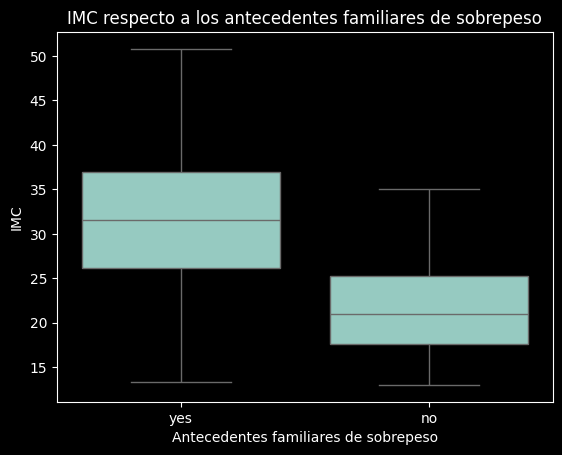

In [557]:
# Creo el gráfico
sns.boxplot(df, x='family_history_with_overweight', y='IMC')

# Etiquetamos los ejes
plt.xlabel("Antecedentes familiares de sobrepeso")
plt.ylabel("IMC")

# Agregamos el título
plt.title("IMC respecto a los antecedentes familiares de sobrepeso")

# Mostramos el gráfico
plt.show()

Se puede apreciar como afectan los antecedentes familiares en el sobrepeso. Como también que nuestra población no posee datos anómalos.

#####**10.2.2. Prueba respecto a 'NObeyesdad' y 'cat_IMC':**

<Figure size 640x480 with 0 Axes>

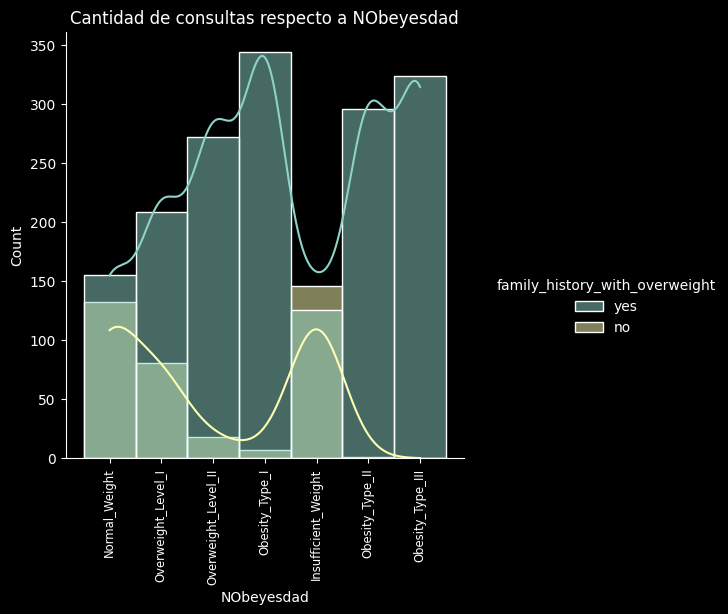

In [558]:
# Creamos el gráfico
plt.figure()
ax = sns.displot(data=df, x='NObeyesdad', kind='hist', hue='family_history_with_overweight', kde=True)
ax.set(xlabel='NObeyesdad', title='Cantidad de consultas respecto a NObeyesdad')

# Cambiamos el tamaño de las etiquetas del eje x y rótalas 90 grados
plt.xticks(rotation=90, fontsize='small')

# Mostramos el gráfico
plt.show()

<Figure size 640x480 with 0 Axes>

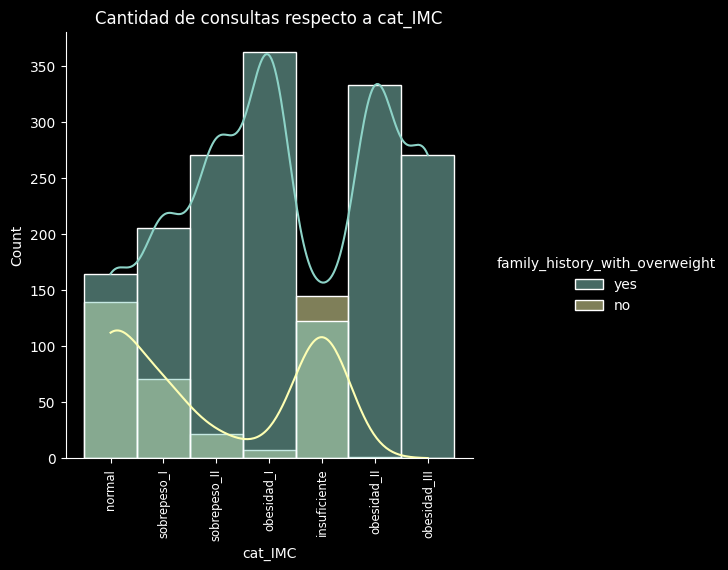

In [559]:
# Creamos el gráfico
plt.figure()
ax = sns.displot(data=df, x='cat_IMC', kind='hist', hue='family_history_with_overweight', kde=True)
ax.set(xlabel='cat_IMC', title='Cantidad de consultas respecto a cat_IMC')

# Cambiamos el tamaño de las etiquetas del eje x y rótalas 90 grados
plt.xticks(rotation=90, fontsize='small')

# Mostramos el gráfico
plt.show()

Podemos observar que las personas que poseen algún grado de sobrepeso u obesidad, casi en su totalidad, poseen antecedentes familiares.
Mientras que en los casos de "Insufficient_Weight"/"insuficiente" y "Normal_Weight"/"normal" se dan de forma más pareja los casos con y sin antecedentes.

###**10.3. ¿Cuál es el intervalo de confianza para el 95% de la media del IMC?**

In [561]:
#CALCULO NIVEL DE CONFIANZA:

#Calculamos la media y la desviación estándar respecto al IMC
media = np.mean(df['IMC'])
desviacion_estandar = np.std(df['IMC'])

#Calculamos el intervalo de confianza del 95% usando la distribución t
#Es apropiado cuando tienes una muestra pequeña y no sabes si la población está normalmente distribuida
grados_libertad = len(df['IMC']) - 1
t_critico = np.abs(t.ppf((1 - 0.95) / 2, grados_libertad))
int_confianza_t = (media - t_critico * desviacion_estandar / np.sqrt(len(df['IMC'])), media + t_critico * desviacion_estandar / np.sqrt(len(df['IMC'])))
print(f"Intervalo de confianza del 95% para la media del IMC (distribución t): {int_confianza_t}")

#Calculamos el intervalo de confianza del 95% usando la distribución normal
#Es apropiado cuando tienes una gran muestra o cuando sabes que la población está normalmente distribuida
int_confianza_normal = stats.norm.interval(0.95, loc=media, scale=desviacion_estandar)
print(f"Intervalo de confianza del 95% para la media del IMC (distribución normal): {int_confianza_normal}")

Intervalo de confianza del 95% para la media del IMC (distribución t): (29.360414362699665, 30.044606954211744)
Intervalo de confianza del 95% para la media del IMC (distribución normal): (13.993700408178857, 45.41132090873255)


 Debido a que los datos no se distribuyen normalmente se debe considerar la distribución t.

 Siendo el intervalo de confianza: (29.360414362699668, 30.044606954211748)

###**10.4. ¿Cómo se distribuyen las distintas categorías de NObeyesdad y de cat_IMC respecto a las edades estudiadas?**

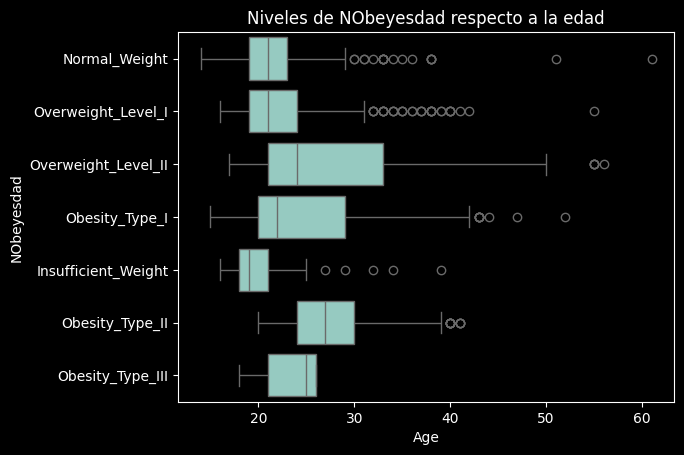

In [562]:
# Creo el gráfico
sns.boxplot(df, x='Age', y='NObeyesdad')

# Etiquetamos los ejes
plt.xlabel("Age")
plt.ylabel("NObeyesdad")

# Agregamos el título
plt.title("Niveles de NObeyesdad respecto a la edad")

# Mostramos el gráfico
plt.show()

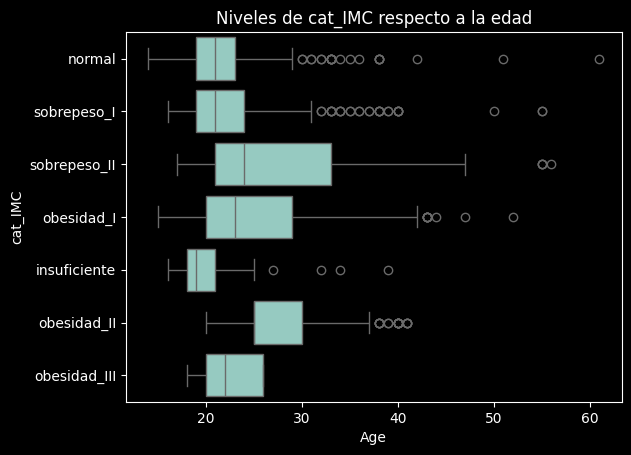

In [563]:
# Creo el gráfico
sns.boxplot(df, x='Age', y='cat_IMC')

# Etiquetamos los ejes
plt.xlabel("Age")
plt.ylabel("cat_IMC")

# Agregamos el título
plt.title("Niveles de cat_IMC respecto a la edad")

# Mostramos el gráfico
plt.show()

En base a la distribución respecto a los niveles de obesidad se pueden notar que los casos extremos, "Insufficient_Weight"/"insuficiente" y "Obesity_Type_III"/"obesidad_III", se desarrollan mayoritariamente en edades más tempranas comparadas a las demás.


###**10.5. ¿Cómo es la clasificación respecto a la categorización sobre el IMC?**

In [564]:
# Eliminamos NObeyesdad y trabajamos con cat_IMC
df_sin_NObeyesdad = df_preprocessed.drop('NObeyesdad', axis=1)

# Definimos las variables dependiente e independiente
X = df_sin_NObeyesdad.drop('cat_IMC', axis=1)
y = df_sin_NObeyesdad['cat_IMC']

In [565]:
# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)

In [566]:
# Definir el scaler y escalar las columnas numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

In [567]:
# Convertir los datos escalados de nuevo a un DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include=['int64', 'float64']).columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.select_dtypes(include=['int64', 'float64']).columns, index=X_test.index)

# Update de datos escalados
X_train.update(X_train_scaled)
X_test.update(X_test_scaled)

 #### Árbol de decisión:

In [568]:
# Crear y entrenar el modelo
arbol = DecisionTreeClassifier(random_state=73)
arbol.fit(X=X_train, y=y_train)

# Predecir para valores de prueba
y_pred_arbol = arbol.predict(X_test)

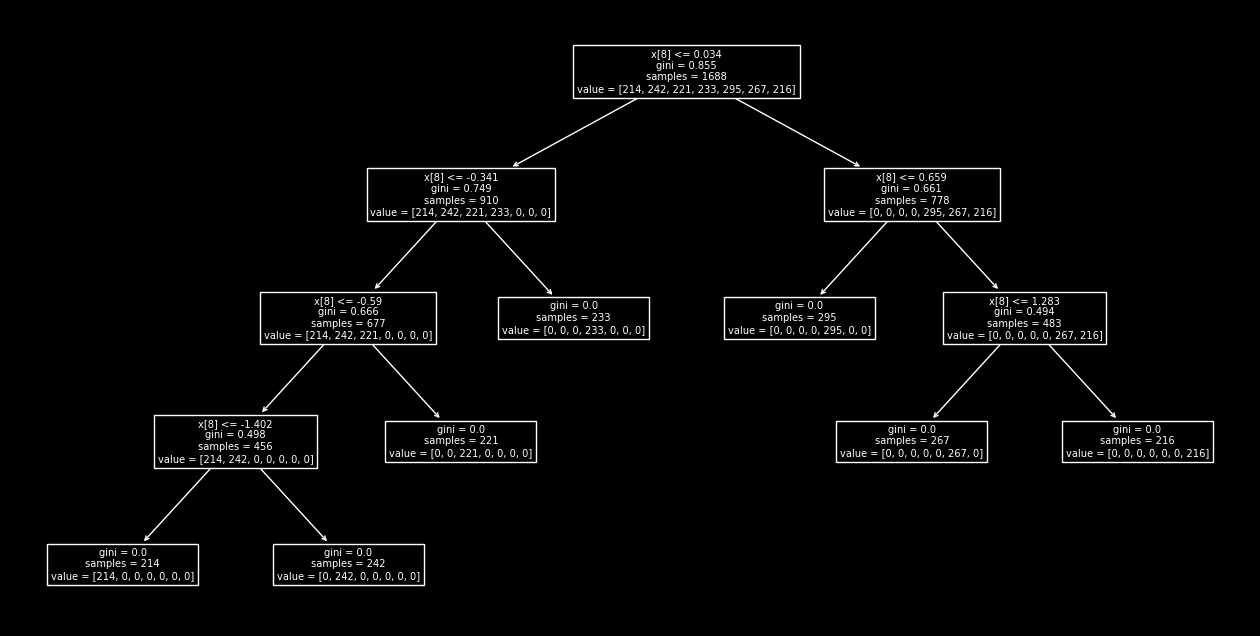

In [569]:
# Visualizar el árbol de decisión
plt.figure(figsize=(16,8))
plot_tree(decision_tree=arbol)
plt.show()

Text(0.5, 23.52222222222222, 'Valores predicción')

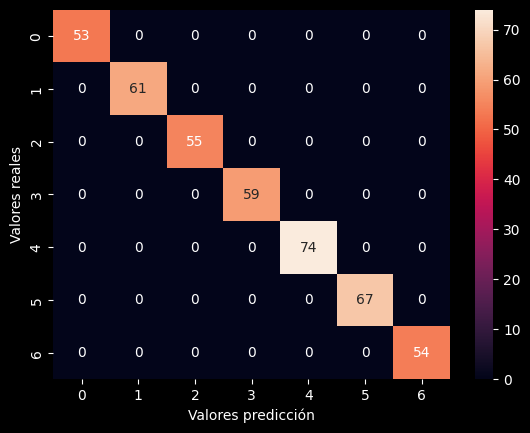

In [570]:
# Crear matríz de confusión
cm_arbol = confusion_matrix(y_true=y_test, y_pred=y_pred_arbol)

# Armar DataFrame para mejor visualización
df_cm_arbol = pd.DataFrame(cm_arbol)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_arbol, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [571]:
# Calcular métricas de clasificación para testeo
accuracy = accuracy_score(y_test, y_pred_arbol)
precision = precision_score(y_test, y_pred_arbol, average='macro')
recall = recall_score(y_test, y_pred_arbol, average='macro')
f1 = f1_score(y_test, y_pred_arbol, average='macro')
#roc_auc = roc_auc_score(y_test, y_pred_arbol, multi_class='ovr')

y_pred_train = arbol.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro')
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
#roc_auc_train = roc_auc_score(y_train, y_pred_train, multi_class='ovr')

# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
#print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"ROC AUC Score: {roc_auc}")


Métricas en el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Métricas en el conjunto de prueba:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


 #### k-NN:

In [572]:
# Crear modelo
knn = KNeighborsClassifier(n_neighbors=7)

# Ajustar el modelo
knn.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_knn = knn.predict(X_test)

Text(0.5, 23.52222222222222, 'Valores predicción')

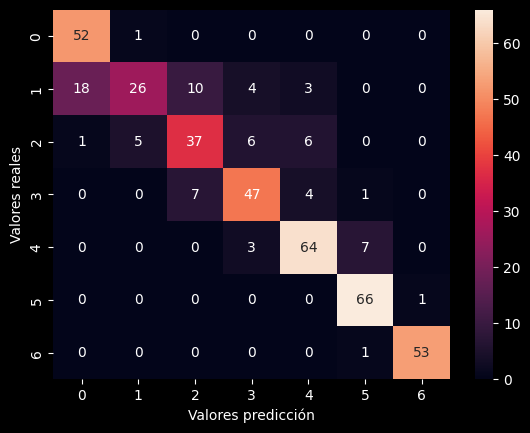

In [573]:
# Crear matríz de confusión
cm_knn = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)

# Armar DataFrame para mejor visualización
df_knn = pd.DataFrame(cm_knn)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_knn, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [574]:
# Calcular métricas de clasificación para testeo
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')
#roc_auc = roc_auc_score(y_test, y_pred_arbol, multi_class='ovr')

y_pred_train = knn.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro')
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
#roc_auc_train = roc_auc_score(y_train, y_pred_train, multi_class='ovr')

# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
#print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"ROC AUC Score: {roc_auc}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.8761848341232228
Precision: 0.8749842888754646
Recall: 0.8757812754151618
F1 Score: 0.8694246279060234

Métricas en el conjunto de prueba:
Accuracy: 0.8156028368794326
Precision: 0.8151518853380021
Recall: 0.8154457141570337
F1 Score: 0.8036293681137808


 #### Regresión logística:

In [575]:
# Creamos el modelo
log_reg = LogisticRegression(random_state=73)

# Ajustar el modelo
log_reg.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_log = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 23.52222222222222, 'Valores predicción')

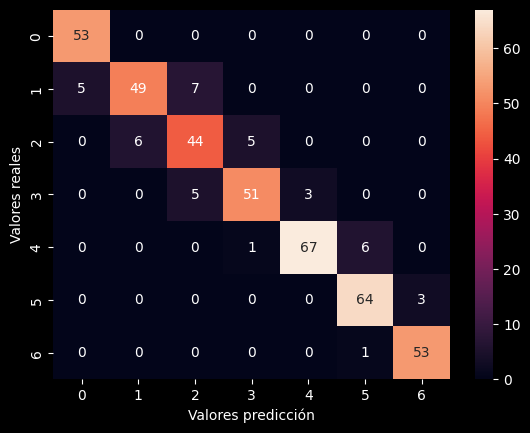

In [576]:
# Crear matríz de confusión
cm_log = confusion_matrix(y_true=y_test, y_pred=y_pred_log)

# Armar DataFrame para mejor visualización
df_log = pd.DataFrame(cm_log)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_log, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [577]:
# Calcular métricas de clasificación para testeo
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='macro')
recall = recall_score(y_test, y_pred_log, average='macro')
f1 = f1_score(y_test, y_pred_log, average='macro')
#roc_auc = roc_auc_score(y_test, y_pred_arbol, multi_class='ovr')

y_pred_train = log_reg.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro')
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
#roc_auc_train = roc_auc_score(y_train, y_pred_train, multi_class='ovr')

# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
#print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"ROC AUC Score: {roc_auc}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.9046208530805687
Precision: 0.9026825311630817
Recall: 0.906509041629854
F1 Score: 0.9036185323266663

Métricas en el conjunto de prueba:
Accuracy: 0.900709219858156
Precision: 0.898590457350367
Recall: 0.9013994622385013
F1 Score: 0.899087689979744


 #### Dentro de los 3 algoritmos de aprendizaje supervisado se podría considerar que el que mejor responde es el árbol de decisión, dado que brinda un mejor accuracy.

###**10.6. ¿Cómo es la clasificación respecto a la categorización inicial de NObeyesdad?**

In [578]:
# Eliminamos cat_IMC y trabajamos con NObeyesdad
df_sin_catIMC = df_preprocessed.drop('cat_IMC', axis=1)

# Definimos las variables dependiente e independiente
X = df_sin_catIMC.drop('NObeyesdad', axis=1)
y = df_sin_catIMC['NObeyesdad']

In [579]:
# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)

In [580]:
# Definir el scaler y escalar las columnas numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

In [581]:
# Convertir los datos escalados de nuevo a un DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include=['int64', 'float64']).columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.select_dtypes(include=['int64', 'float64']).columns, index=X_test.index)

# Update de datos escalados
X_train.update(X_train_scaled)
X_test.update(X_test_scaled)

 #### Árbol de decisión:

In [582]:
# Crear y entrenar el modelo
arbol = DecisionTreeClassifier(random_state=73)
arbol.fit(X=X_train, y=y_train)

# Predecir para valores de prueba
y_pred_arbol = arbol.predict(X_test)

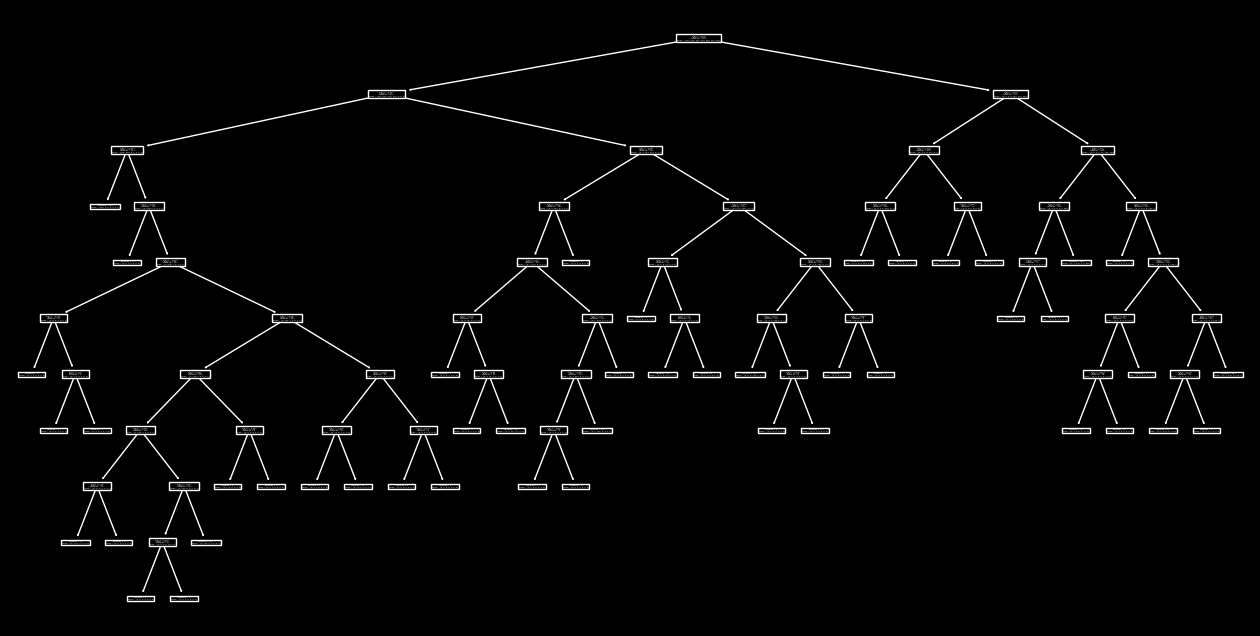

In [583]:
# Visualizar el árbol de decisión
plt.figure(figsize=(16,8))
plot_tree(decision_tree=arbol)
plt.show()

Text(0.5, 23.52222222222222, 'Valores predicción')

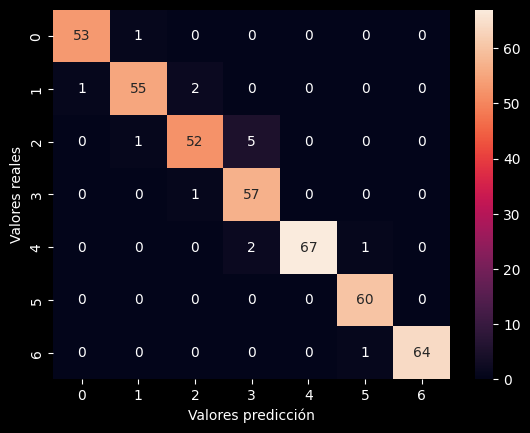

In [584]:
# Crear matríz de confusión
cm_arbol = confusion_matrix(y_true=y_test, y_pred=y_pred_arbol)

# Armar DataFrame para mejor visualización
df_cm_arbol = pd.DataFrame(cm_arbol)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_arbol, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [585]:
# Calcular métricas de clasificación para testeo
accuracy = accuracy_score(y_test, y_pred_arbol)
precision = precision_score(y_test, y_pred_arbol, average='macro')
recall = recall_score(y_test, y_pred_arbol, average='macro')
f1 = f1_score(y_test, y_pred_arbol, average='macro')
#roc_auc = roc_auc_score(y_test, y_pred_arbol, multi_class='ovr')

y_pred_train = arbol.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro')
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
#roc_auc_train = roc_auc_score(y_train, y_pred_train, multi_class='ovr')

# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
#print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"ROC AUC Score: {roc_auc}")


Métricas en el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Métricas en el conjunto de prueba:
Accuracy: 0.9645390070921985
Precision: 0.9643164633030932
Recall: 0.9644037043051822
F1 Score: 0.9638200345135104


 #### k-NN:

In [586]:
# Crear modelo
knn = KNeighborsClassifier(n_neighbors=7)

# Ajustar el modelo
knn.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_knn = knn.predict(X_test)

Text(0.5, 23.52222222222222, 'Valores predicción')

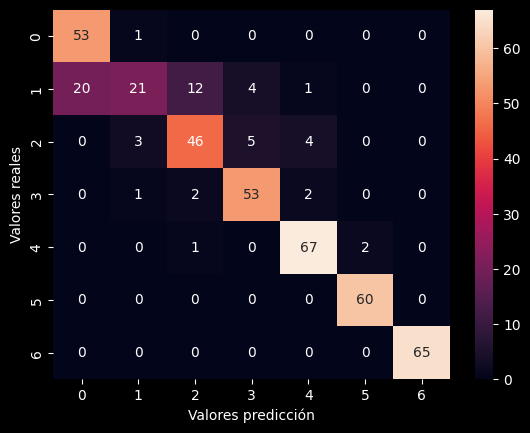

In [587]:
# Crear matríz de confusión
cm_knn = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)

# Armar DataFrame para mejor visualización
df_knn = pd.DataFrame(cm_knn)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_knn, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [588]:
# Calcular métricas de clasificación para testeo
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')
#roc_auc = roc_auc_score(y_test, y_pred_arbol, multi_class='ovr')

y_pred_train = knn.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro')
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
#roc_auc_train = roc_auc_score(y_train, y_pred_train, multi_class='ovr')

# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
#print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"ROC AUC Score: {roc_auc}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.8969194312796208
Precision: 0.8976133577871475
Recall: 0.8934594383932063
F1 Score: 0.8871846464219038

Métricas en el conjunto de prueba:
Accuracy: 0.8628841607565012
Precision: 0.8594005880250022
Recall: 0.8582271222665312
F1 Score: 0.8436071941792508


 #### Regresión logística:

In [589]:
# Creamos el modelo
log_reg = LogisticRegression(random_state=73)

# Ajustar el modelo
log_reg.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_log = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 23.52222222222222, 'Valores predicción')

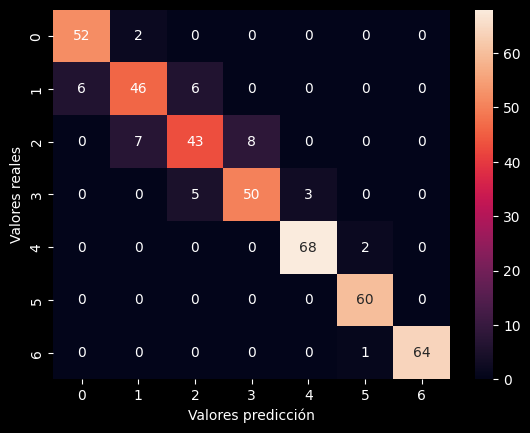

In [590]:
# Crear matríz de confusión
cm_log = confusion_matrix(y_true=y_test, y_pred=y_pred_log)

# Armar DataFrame para mejor visualización
df_log = pd.DataFrame(cm_log)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_log, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [591]:
# Calcular métricas de clasificación para testeo
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='macro')
recall = recall_score(y_test, y_pred_log, average='macro')
f1 = f1_score(y_test, y_pred_log, average='macro')
#roc_auc = roc_auc_score(y_test, y_pred_arbol, multi_class='ovr')

y_pred_train = log_reg.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='macro')
recall_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')
#roc_auc_train = roc_auc_score(y_train, y_pred_train, multi_class='ovr')

# Mostrar métricas de training para comparación
print("\nMétricas en el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
#print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nMétricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"ROC AUC Score: {roc_auc}")


Métricas en el conjunto de entrenamiento:
Accuracy: 0.9265402843601895
Precision: 0.9244306869794562
Recall: 0.925341936739604
F1 Score: 0.9243473743062838

Métricas en el conjunto de prueba:
Accuracy: 0.9054373522458629
Precision: 0.9002011505098996
Recall: 0.9022226633064071
F1 Score: 0.9007219505980677


 #### Al igual que en el caso anterior, se podría considerar que el que mejor responde es el árbol de decisión, dado que brinda un mejor accuracy.

 ### **Conclusión respecto a las preguntas 10.5 y 10.6**:
Ambas datan sobre las distintas categorías respecto al peso de las personas, en la primera trabajamos con el valor calculado mediante el uso del IMC, y la segunda utiliza las divisiones iniciales.

Podemos observar que en ambos casos el mejor accuracy se obtuvo utilizando un árbol de decisión como método de aprendizaje, pero si las comparamos entre sí, el caso de 10.5 es mejor que el de 10.6, pudiendo descartarse el campo NObeyesdad.

 ### **10.7. ¿La forma de clasificación planteada es correcta o conviene otra?**

In [592]:
# Normalizar las variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sin_NObeyesdad.select_dtypes(include=['int64', 'float64']))

# Convertir los datos escalados de nuevo a un DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = df_sin_NObeyesdad.select_dtypes(include=['int64', 'float64']).columns, index = df_sin_NObeyesdad.index)

# Update de datos escalados
df_sin_NObeyesdad.update(df_scaled)

In [593]:
# Definir las features que voy a utilizar para analizar
X = df_sin_NObeyesdad.drop('cat_IMC', axis=1)

#### K-means:

In [594]:
# Instanciar el modelo
k_means = KMeans(n_clusters=7, n_init=10, random_state=73)

# Ajusto el modelo a mis datos
k_means.fit(X)

# Predecir
k_means_labels = k_means.predict(X)

In [595]:
# Visualizar los centroides
centroides = k_means.cluster_centers_

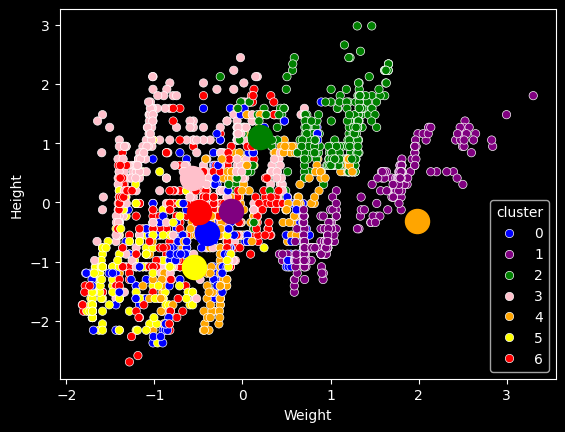

In [596]:
# Gráfico de puntos mostrando los centroides
color = ['blue', 'purple', 'green', 'pink', 'orange', 'yellow', 'red']

# Creo nueva variable que contenga los valores obtenidos en el cluster
df_sin_NObeyesdad['cluster'] = k_means_labels

# Creo Scatterplot
sns.scatterplot(data=df_sin_NObeyesdad, x=df_sin_NObeyesdad.Weight, y=df_sin_NObeyesdad.Height, hue='cluster', palette=color)

# Graficar centroides
for i, centroid in enumerate(centroides):
  plt.scatter(centroid[0], centroid[1], c= color[i], s= 300)

plt.show()


In [597]:
# Comparar los clusters generados contra cat_IMC anterior
df_sin_NObeyesdad.groupby(['cat_IMC','cluster']).size()

cat_IMC  cluster
0.0      0            9
         1            0
         2            0
         3          113
         4            1
         5           85
         6           59
1.0      0           47
         1            0
         2            3
         3           89
         4           14
         5           65
         6           85
2.0      0           71
         1            0
         2           11
         3           56
         4           40
         5           20
         6           78
3.0      0           40
         1            0
         2           42
         3           46
         4           83
         5           12
         6           69
4.0      0           59
         1            0
         2          111
         3           40
         4           89
         5           11
         6           59
5.0      0           28
         1           64
         2          191
         3            0
         4           50
         5            1

**Método del codo**

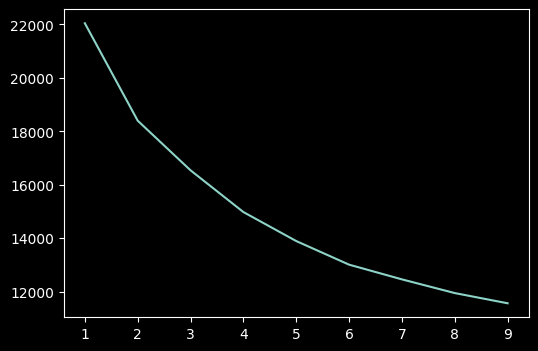

In [598]:
# Método del codo
inertia = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
sns.lineplot(x=range(1,10), y=inertia)
plt.show()

Al analizar la gráfica no se logra distinguir un codo para indicar la cantidad de clusters.

**Coeficiente de silueta**

In [599]:
# Calcular coeficiente de silueta
silhouette_kmeans = silhouette_score(X, k_means_labels)

print(silhouette_kmeans)

0.15622486543146685


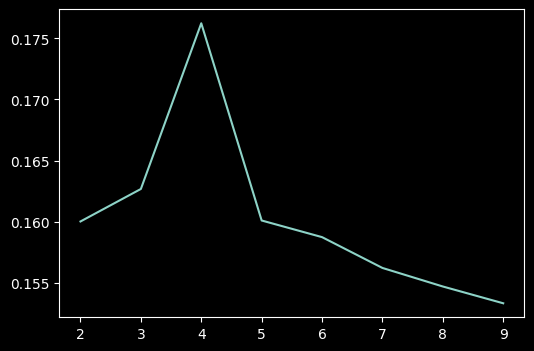

In [600]:
# Grafico de silueta
silhouette = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i, n_init=10, random_state=73)
  kmeans.fit(X)
  silhouette.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(6,4))
sns.lineplot(x=range(2,10), y=silhouette)
plt.show()

El pico mayor indica la cantidad de clusters que se recomienda utilizar.

#### Agglomerative Clustering:

In [601]:
# Instancio modelo
aggl = AgglomerativeClustering(n_clusters=7)

# Ajustar a mis datos
aggl.fit(X)
aggl_labels = aggl.labels_

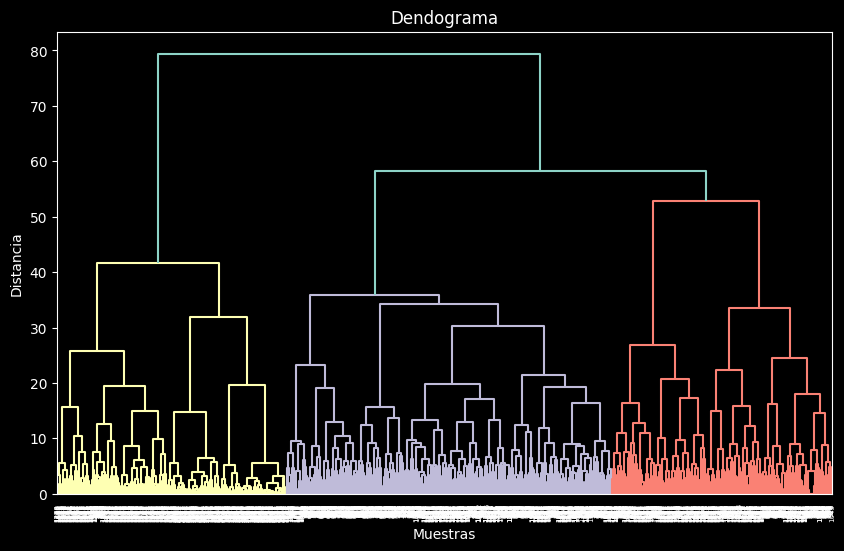

In [602]:
# Genera el dendrograma
Z = linkage(X, 'ward')

plt.figure(figsize=(10,6))
dendrogram(Z)
plt.title('Dendograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

#### DBSCAN:

In [603]:
# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=7)

# Ajusto a los datos
dbscan.fit(X)

dbscan_labels = dbscan.labels_

In [604]:
# Comparar los clusters generados contra cat_IMC anterior
df_sin_NObeyesdad['cluster'] = dbscan_labels
df_sin_NObeyesdad.groupby(['cat_IMC','cluster']).size()

cat_IMC  cluster
0.0      -1           0
          0         267
1.0      -1           5
          0         298
2.0      -1           1
          0         275
3.0      -1           0
          0         292
4.0      -1           0
          0         369
5.0      -1           0
          0         334
6.0      -1           0
          0         270
dtype: int64

 ### **10.8. ¿Cuáles son los componentes principales?**

In [605]:
# Instanciar el modelo
pca = PCA()

X_pca = pca.fit_transform(X)   # X = df_sin_NObeyesdad.drop('cat_IMC', axis=1)

df_pca = pd.DataFrame(X_pca)

df_pca.columns = ['PC'+str(i) for i in range(df_pca.shape[1])]

df_pca['cat_IMC'] = df_sin_NObeyesdad['cat_IMC']

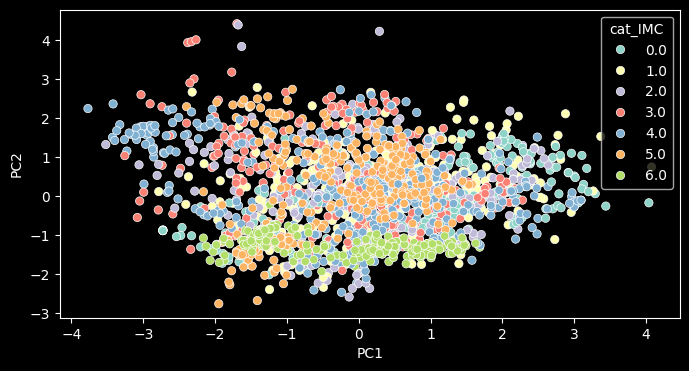

In [606]:
# Gráfico de dispersión para las 2 principales componentes
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cat_IMC')
plt.show()

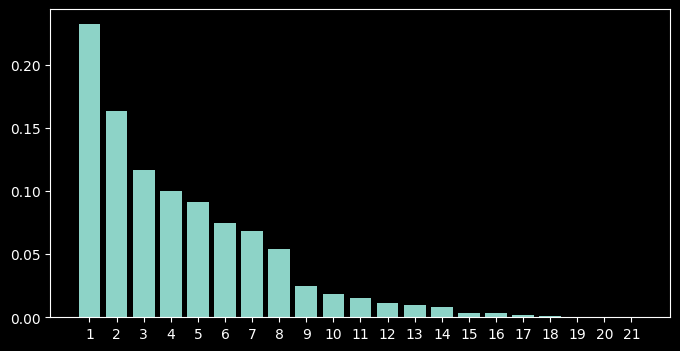

In [607]:
# Graficamos la fracción de varianza que aporta cada componente y la información acumulada
explained_variance = pca.explained_variance_ratio_

# Grafico de barras
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xticks(range(1, len(explained_variance) + 1))

plt.show()

Con las primeras 14 componentes del gráfico se acumula más del 90% de las varianzas acumuladas, por lo que se puede reducir la dimensionalidad eliminando las restantes.